# Company Data

In [207]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [208]:
# Import dataset
data=pd.read_csv('Company_Data (1).csv')

In [209]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [211]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


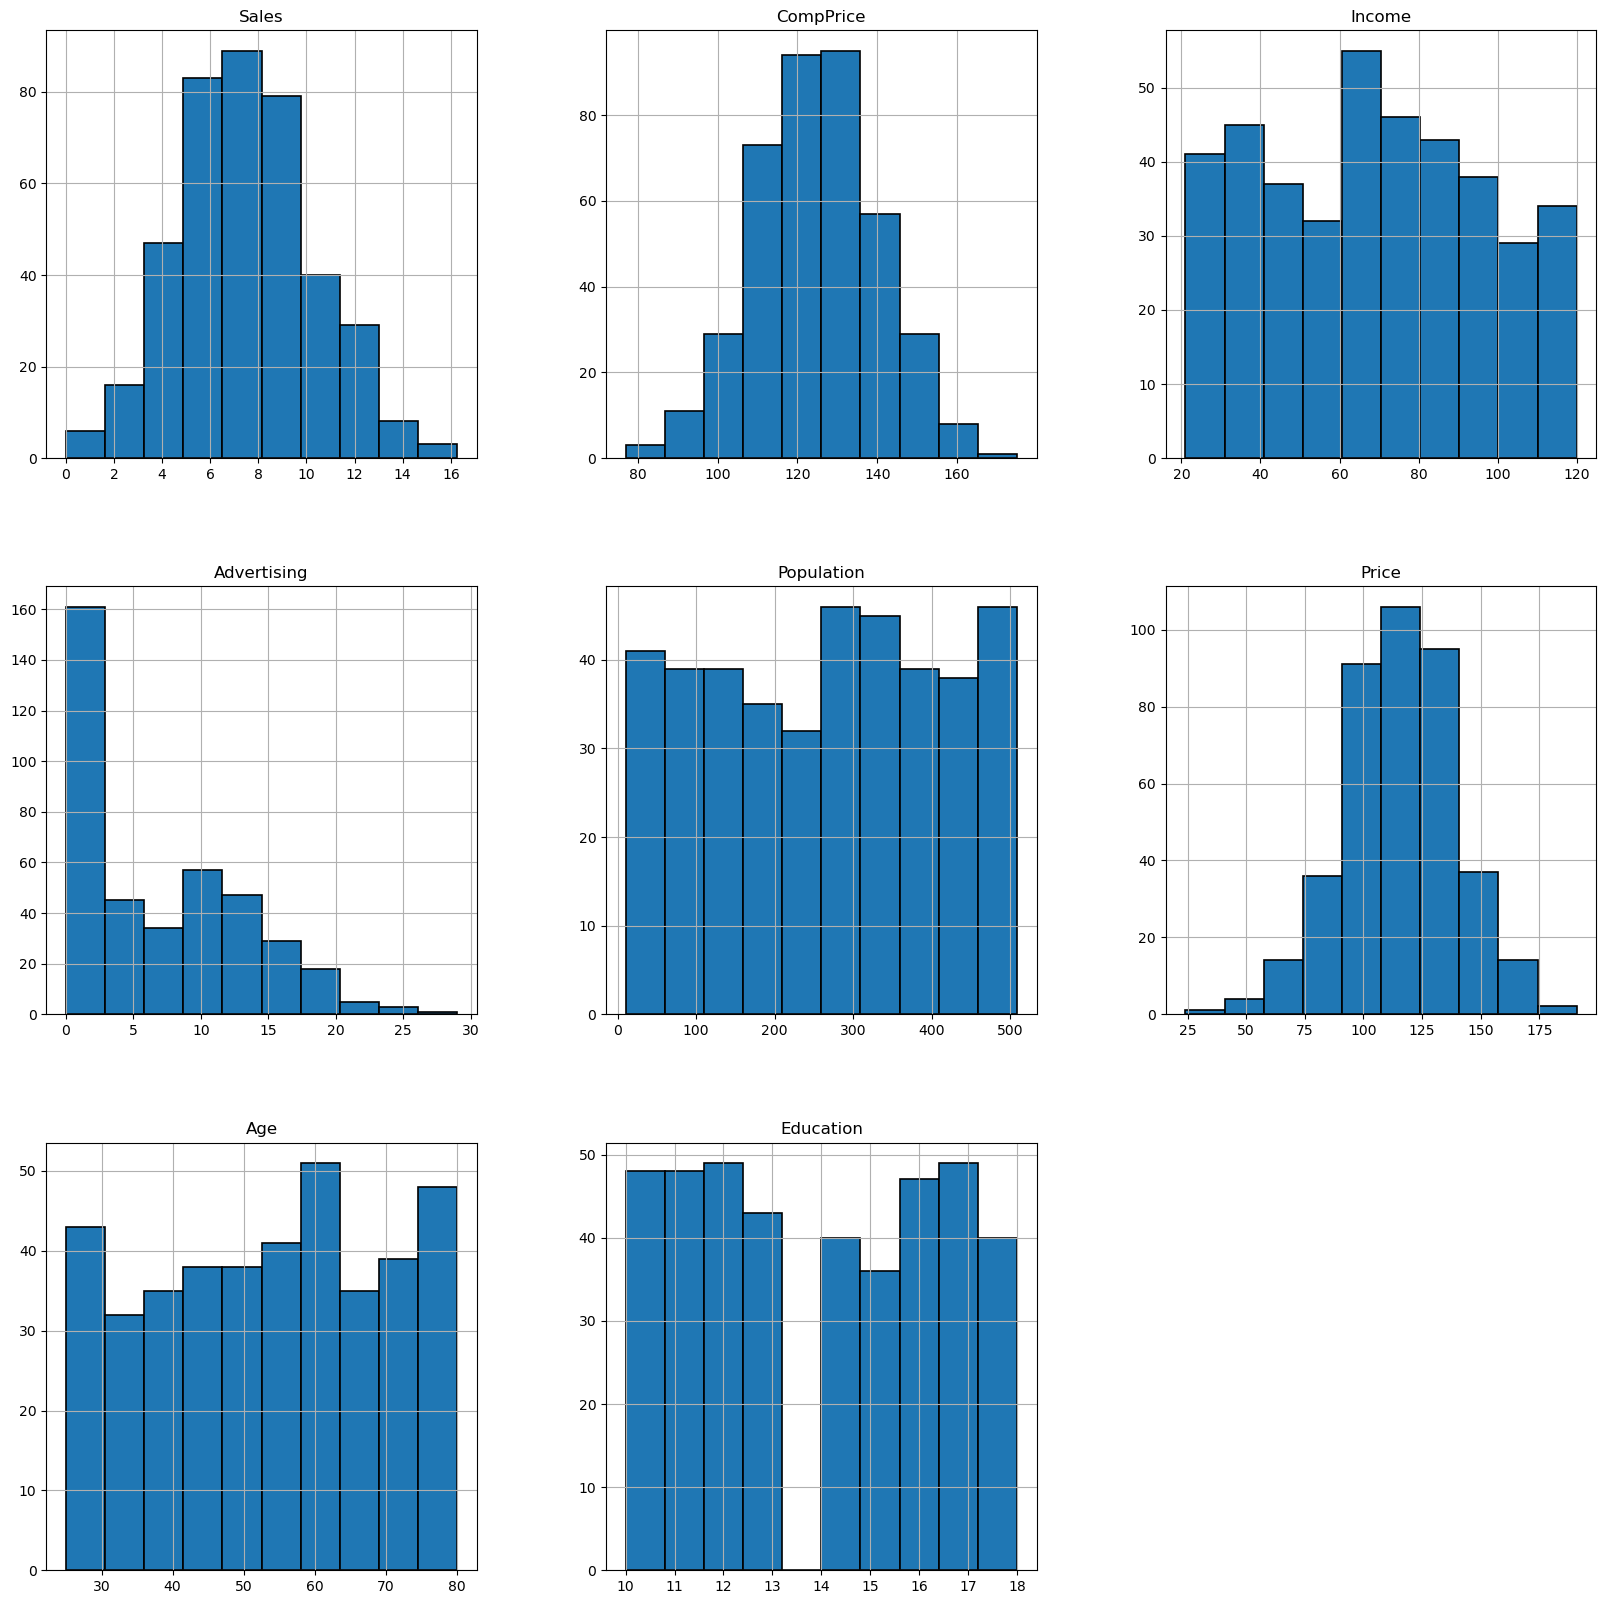

In [212]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [213]:
data['Sales_Category'] = pd.cut(data['Sales'], bins=[0, 5, 10, 15, 20, 25], labels=['Low', 'Moderate', 'High', 'Very High', 'Excellent'])

In [214]:
data.drop('Sales', axis=1, inplace=True)

In [215]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Moderate
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Moderate
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Moderate
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Moderate
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Moderate


In [216]:
# convert the data into numeric so we used to import labelencoding
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [217]:
lab_enc=LabelEncoder()

In [218]:
data['ShelveLoc']=lab_enc.fit_transform(data['ShelveLoc'])
data['Urban']=lab_enc.fit_transform(data['Urban'])
data['US']=lab_enc.fit_transform(data['US'])
data['Sales_Category']=lab_enc.fit_transform(data['Sales_Category'])

In [219]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,2
397,162,26,12,368,159,2,40,18,1,1,2
398,100,79,7,284,95,0,50,12,1,1,2


In [220]:
std=StandardScaler()

In [221]:
std.fit_transform(data)

array([[ 0.85045499,  0.15536099,  0.65717702, ...,  0.64686916,
         0.74188112,  0.6938477 ],
       [-0.91248434, -0.73906037,  1.40995711, ...,  0.64686916,
         0.74188112, -1.78417979],
       [-0.78189624, -1.20415947,  0.506621  , ...,  0.64686916,
         0.74188112, -1.78417979],
       ...,
       [ 2.41751217, -1.52615116,  0.80773304, ...,  0.64686916,
         0.74188112,  0.6938477 ],
       [-1.63071888,  0.37002211,  0.05495295, ...,  0.64686916,
         0.74188112,  0.6938477 ],
       [ 0.58927879, -1.13260576, -0.99893918, ...,  0.64686916,
         0.74188112,  0.6938477 ]])

In [222]:
data1=pd.DataFrame(std.fit_transform(data),columns=data.columns)

In [223]:
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881,0.693848
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881,-1.784180
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881,-1.784180
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881,0.693848
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925,-0.545166
...,...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-0.369399,-1.256023,0.038208,0.646869,0.741881,-1.784180
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.831899,0.103677,-1.108033,-1.545908,0.741881,0.693848
397,2.417512,-1.526151,0.807733,0.700853,1.827078,0.831899,-0.823391,1.566529,0.646869,0.741881,0.693848
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-1.570698,-0.205346,-0.725953,0.646869,0.741881,0.693848


In [224]:
target=data['Sales_Category']

In [225]:
target

0      2
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: Sales_Category, Length: 400, dtype: int32

In [228]:
features=data1.drop('Sales_Category',axis=1)

In [229]:
features

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.850455,0.155361,0.657177,0.075819,0.177823,-1.570698,-0.699782,1.184449,0.646869,0.741881
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,-0.369399,0.721723,-1.490113,0.646869,0.741881
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,0.831899,0.350895,-0.725953,0.646869,0.741881
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,0.831899,0.103677,0.038208,0.646869,0.741881
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,-1.570698,-0.947000,-0.343872,0.646869,-1.347925
...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,-0.369399,-1.256023,0.038208,0.646869,0.741881
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,0.831899,0.103677,-1.108033,-1.545908,0.741881
397,2.417512,-1.526151,0.807733,0.700853,1.827078,0.831899,-0.823391,1.566529,0.646869,0.741881
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,-1.570698,-0.205346,-0.725953,0.646869,0.741881


In [230]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=10)

In [231]:
x_train.shape

(280, 10)

In [232]:
y_train.shape

(280,)

In [233]:
y_test.shape

(120,)

In [234]:
y_train.shape

(280,)

# # Model building using Random forest


In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
random_for=RandomForestClassifier(n_estimators=900,bootstrap=True)

In [237]:
random_for.fit(x_train,y_train)

RandomForestClassifier(n_estimators=900)

In [238]:
y_pred=random_for.predict(x_test)

In [239]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2])

In [240]:
accuracy_score(y_test,y_pred)

0.6666666666666666

# Fraud_Check

In [241]:
# Import dataset
data1=pd.read_csv('Fraud_check (1).csv')

In [242]:
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [243]:
# Split the taxable_income into catogory
data1['Taxable.Income'] = data1['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

In [244]:
data1=pd.get_dummies(data1,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [245]:
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,Good,50047,10,0,0,1,1
1,Good,134075,18,1,0,0,1
2,Good,160205,30,0,1,0,1
3,Good,193264,15,1,0,1,1
4,Good,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,Good,39492,7,1,0,0,1
596,Good,55369,2,1,0,0,1
597,Good,154058,0,0,0,0,1
598,Good,180083,17,1,1,0,0


In [246]:
data1.isnull().sum()

Taxable.Income            0
City.Population           0
Work.Experience           0
Undergrad_YES             0
Marital.Status_Married    0
Marital.Status_Single     0
Urban_YES                 0
dtype: int64

In [247]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Taxable.Income          600 non-null    object
 1   City.Population         600 non-null    int64 
 2   Work.Experience         600 non-null    int64 
 3   Undergrad_YES           600 non-null    uint8 
 4   Marital.Status_Married  600 non-null    uint8 
 5   Marital.Status_Single   600 non-null    uint8 
 6   Urban_YES               600 non-null    uint8 
dtypes: int64(2), object(1), uint8(4)
memory usage: 16.5+ KB


In [248]:
data1.describe()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,0.520000,0.323333,0.361667,0.503333
std,49850.075134,8.842147,0.500017,0.468139,0.480884,0.500406
min,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,106493.500000,15.000000,1.000000,0.000000,0.000000,1.000000
75%,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000
max,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000


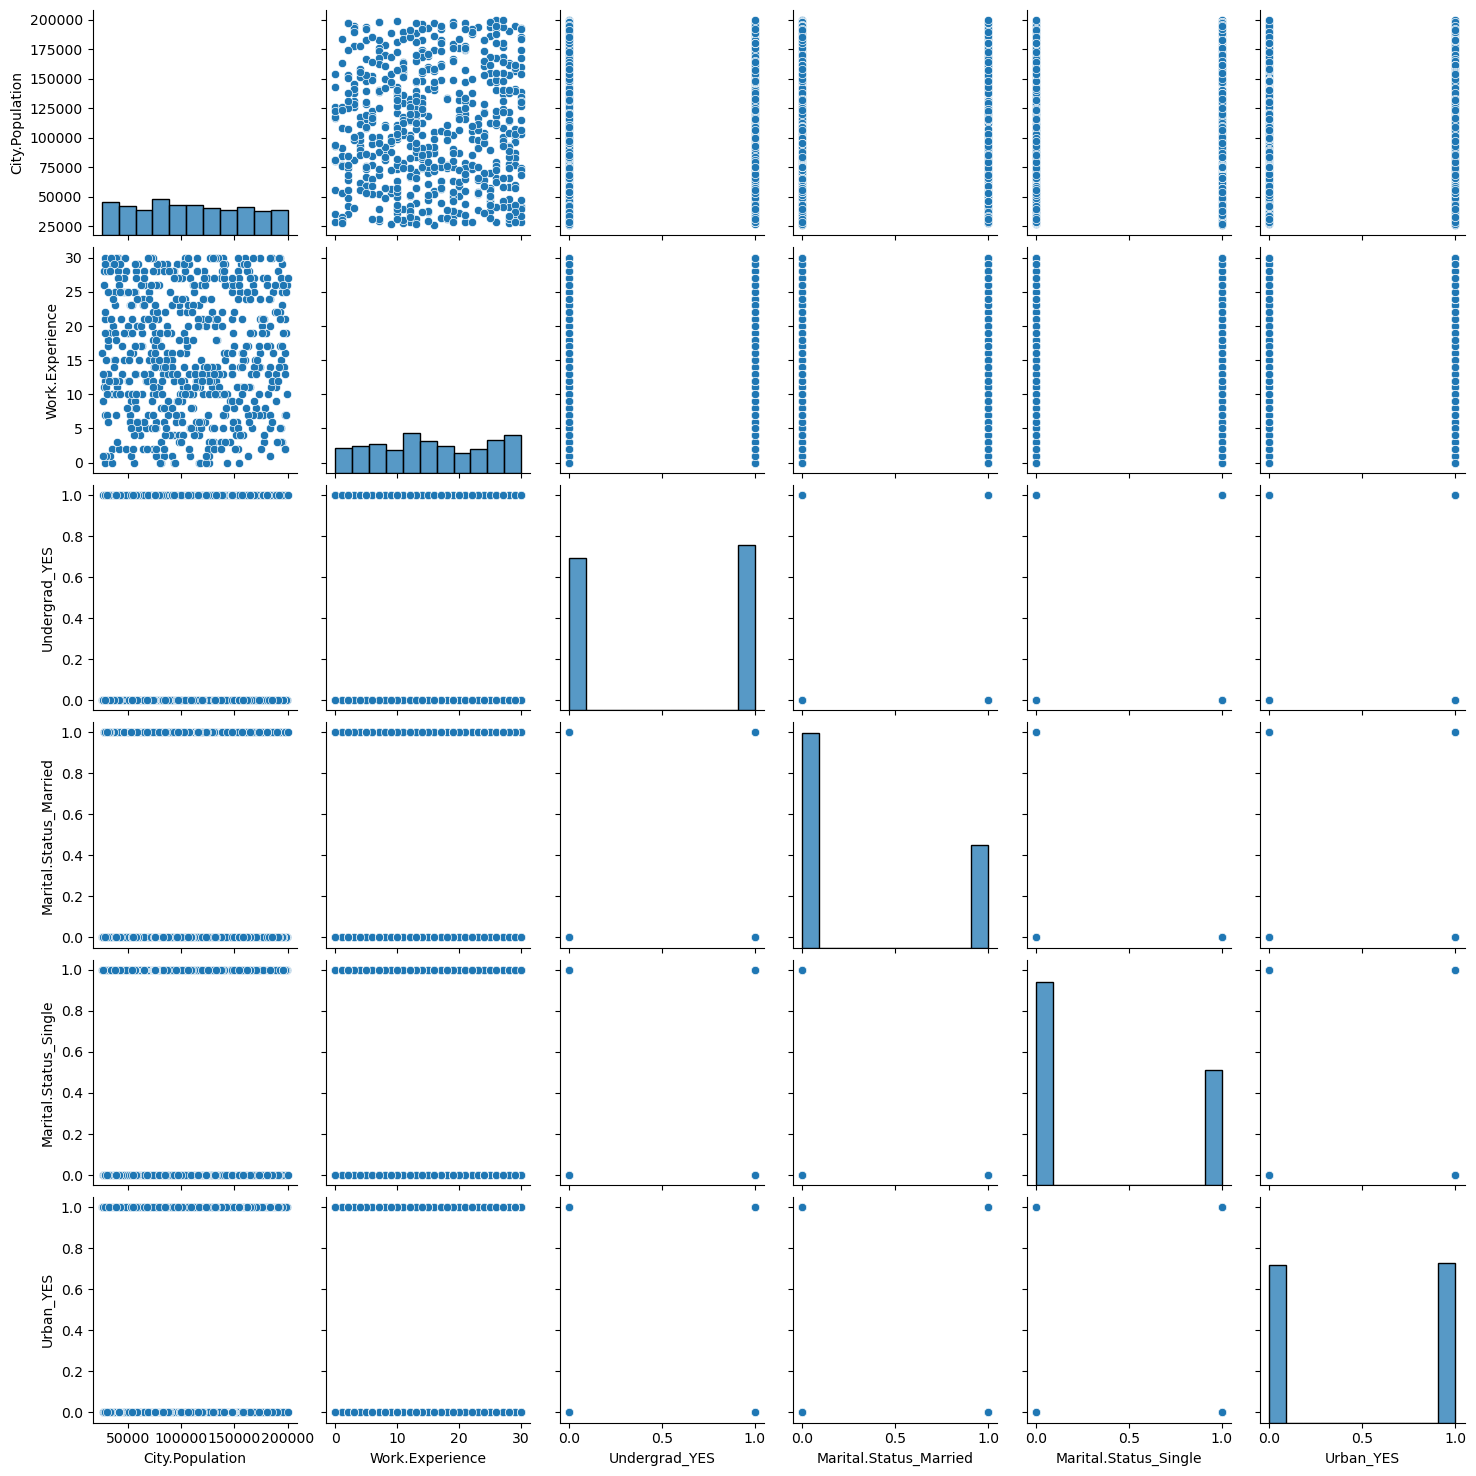

In [249]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=data1)

In [250]:
target=data1['Taxable.Income']

In [251]:
features=data1.drop('Taxable.Income',axis=1)

In [252]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=50)

In [253]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 6)
(180, 6)
(420,)
(180,)


In [254]:
x_train

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
120,135886,11,1,0,1,1
472,151963,11,0,1,0,1
556,34242,12,0,0,1,0
536,157025,14,0,0,1,0
160,79972,0,1,0,0,1
...,...,...,...,...,...,...
70,80904,3,1,0,0,1
132,67820,12,0,0,0,0
289,196816,14,0,0,1,0
109,178585,8,1,1,0,1


In [255]:
y_train

120    Good
472    Good
556    Good
536    Good
160    Good
       ... 
70     Good
132    Good
289    Good
109    Good
480    Good
Name: Taxable.Income, Length: 420, dtype: object

# Model building using Random forest


In [256]:
random=RandomForestClassifier(n_estimators=100,bootstrap=True)

In [257]:
random.fit(x_train,y_train)

RandomForestClassifier()

In [258]:
y_pred=random.predict(x_test)

In [259]:
y_pred

array(['Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'G

In [260]:
accuracy_score(y_test,y_pred)

0.7166666666666667